In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

import numpy as np
from scipy import ndimage
from scipy import misc
import cv2

from coin.segmenter import create_coin_mask

In [5]:
def convert_cv_im_to_scipy_im(im):
    # For some reason open cv loads images as BGR instead of RGB
    return np.dstack((im[:,:,2], im[:,:,1], im[:,:,0]))

In [15]:
# need full path?
im = cv2.imread('/Users/anthonys/Dropbox/College/classes/computer vision/280_final_project/raw_data/Photo Apr 24, 3 04 15 PM.jpg')

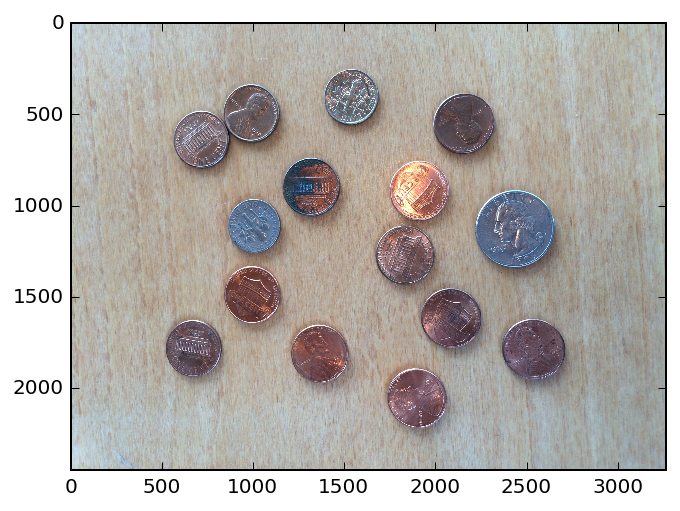

In [19]:
plt.imshow(convert_cv_im_to_scipy_im(im))

In [20]:
# Using just graph cuts
overlay_mask = create_coin_mask(im)

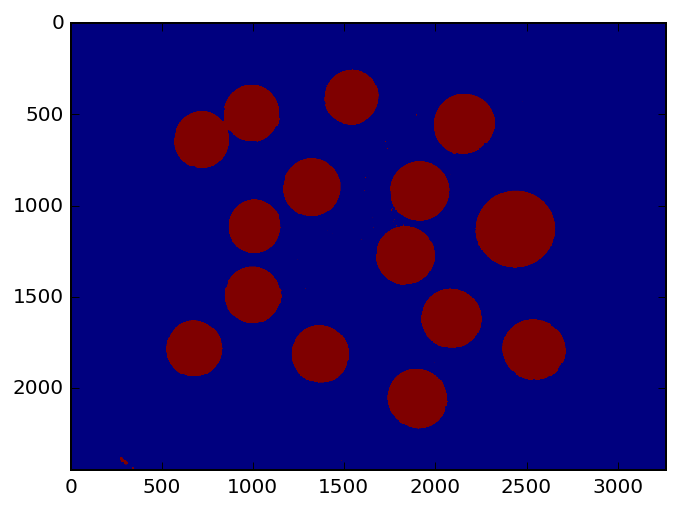

In [23]:
plt.imshow(overlay_mask)

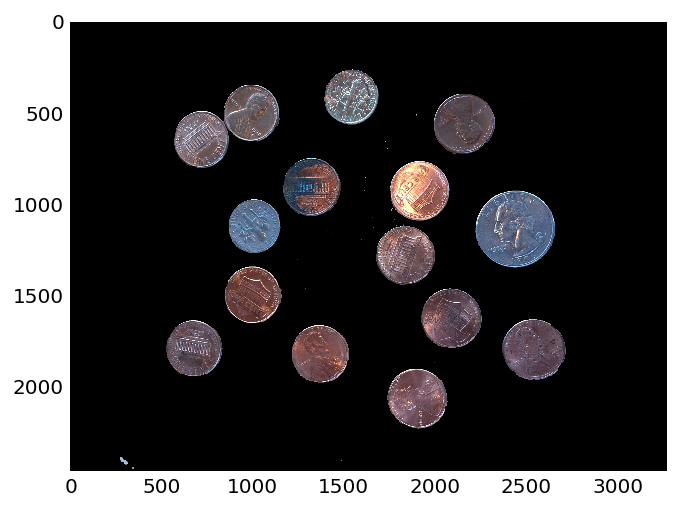

In [25]:
masked_im = im * overlay_mask[:,:,np.newaxis]
plt.imshow(convert_cv_im_to_scipy_im(masked_im))

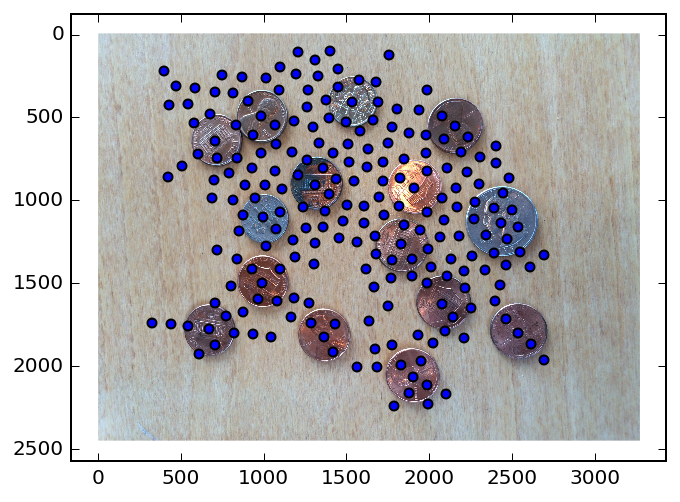

In [41]:
# ALTERNATE METHOD
# Try to find the circles
# Doesn't work very well..
gray_im = cv2.cvtColor(im, cv2.cv.CV_BGR2GRAY)
gray_im = cv2.blur(gray_im, (3,3))
circles = cv2.HoughCircles(gray_im, cv2.cv.CV_HOUGH_GRADIENT, 1, 100, param1=350, param2=20, minRadius=50, maxRadius=500)
plt.imshow(convert_cv_im_to_scipy_im(im))
plt.scatter(circles[0,:,0], circles[0,:,1])

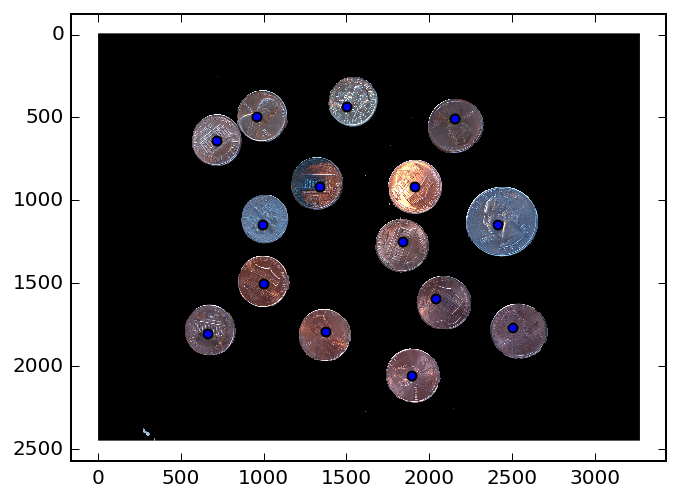

In [45]:
# ALTERNATE METHOD 3
# Find circles from overlay mask
circles = cv2.HoughCircles(overlay_mask * 255, cv2.cv.CV_HOUGH_GRADIENT, 1, 150, param1=100, param2=18, minRadius=50, maxRadius=500)
plt.imshow(convert_cv_im_to_scipy_im(masked_im))
plt.scatter(circles[0,:,0], circles[0,:,1])